In [1]:
import gzip
import numpy as np
def load_image(filename):
    with gzip.open(filename) as f:
        data=np.frombuffer(f.read(), dtype=np.uint8, offset=16)
        data=data.reshape((60000,784))
    return data
def load_label(filename):
    with gzip.open(filename) as f:
        data=np.frombuffer(f.read(), dtype=np.uint8, offset=8)
    return data
X_train=load_image('train-images-idx3-ubyte.gz')
Y_train=load_label('train-labels-idx1-ubyte.gz')

In [2]:
Y_train = Y_train.reshape(1,-1)
print(Y_train.shape)

(1, 60000)


(60000, 28, 28)


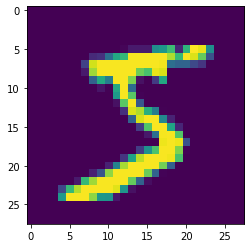

In [3]:
X_train=X_train.reshape(-1,28,28)
X_train = X_train/255
import matplotlib.pyplot as plt
print(X_train.shape)
plt.imshow(X_train[0])

In [4]:
X_train = X_train.reshape(-1, 28*28).T
def initialize_parameters(nx,m):
    W=np.random.randn(10,nx)
    b=np.zeros((10,1))
    return (W,b)     

In [5]:
Y_train = np.eye(10)[Y_train.reshape(-1)].T
print(Y_train.shape)

(10, 60000)


In [6]:
def softmax(Z):
    A=np.exp(Z)/np.sum(np.exp(Z),axis=0)
    return A

In [7]:
def forward_propagation(X,W,b):
    Z=np.dot(W,X)+b
    #print("Z = ", Z)
    A=softmax(Z)
    #print("A = ", A)
    return A

In [8]:
def compute_cost(Y,A):
    m=Y.shape[1]
    c = (-1/m)*np.sum(Y*np.log(A))
    return c  

In [9]:
m = X_train.shape[1]
nx = X_train.shape[0]
W, b = initialize_parameters(nx, m)
print(W[:, 1])
print(b.shape)

[-1.35889381 -0.36885417 -0.44732209  1.93123012  0.19466279  1.98499831
  0.52971006  1.12733194  0.39548112  1.27577028]
(10, 1)


In [10]:
A = forward_propagation(X_train, W, b)
print(A[:,0])
print(Y_train[:,0])
cost = compute_cost(Y_train, A)
print(cost)

[3.21432078e-10 3.73993207e-03 3.03150692e-04 1.67948754e-09
 2.83787080e-07 9.65019279e-01 1.37548883e-02 1.69437582e-02
 1.34044368e-06 2.37365266e-04]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
13.810744825063294


In [11]:
def back_propagation(A, X, Y, W, b, learning_rate = 0.1):
    dZ = A - Y    # /m  divide by m
    #print('dZ =', dZ[:, 1])
    #print('W =', W[:, 1])
    dW = np.dot(dZ,X.T)
    #gradient clipping
    for i in range(dW.shape[0]):
        for j in range(dW.shape[1]):
            if dW[i, j] < -0.5:
                dW[i, j] = -0.5
            if dW[i, j] > 0.5:
                dW[i, j] = 0.5
    #print('dW.shape =', dW.shape)
    #print('dW =', dW[:, 1])
    db = dZ[:,1].reshape(10, 1)
    #print('db.shape=', db.shape)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    #print('b.shape =', b.shape)
    return W,b

In [12]:
W, b= back_propagation(A, X_train, Y_train, W, b)
print('W =',W[:, 0])
print('b =',b[:, 0])

W = [ 0.59592742  0.33366521  0.52449971  0.88588116 -0.03085525 -0.42342012
 -0.49836601  0.17529812 -0.82126523  0.94844937]
b = [ 9.67931979e-02 -2.92908527e-02 -8.75954159e-08 -1.25486137e-07
 -5.14199501e-07 -1.81880969e-05 -5.40380075e-03 -6.19706053e-02
 -3.68766621e-11 -1.09023652e-04]


In [84]:
#train for more iterations with varying(decreasing) learning rate until there is no remarkable change in the cost function
for i in range(1, 100): 
    A = forward_propagation(X_train, W, b)
    cost = compute_cost(Y_train, A)
    print(cost)
    W, b= back_propagation(A, X_train, Y_train, W, b, learning_rate = 0.001)

0.27424118592954605
0.2742094887949655
0.2741799297274813
0.27414827138459114
0.2741185957481013
0.2740868892296241
0.27405725005510323
0.27402574771324745
0.27399645499321745
0.27396543281608665
0.2739367657478999
0.27390642216306366
0.27387814528815746
0.27384817781738413
0.2738199446429489
0.2737900188911945
0.2737617365746795
0.27373176353096546
0.27370336704977605
0.27367323064553617
0.2736446991435883
0.27361440475507687
0.2735857767790229
0.2735553951166144
0.27352670586953803
0.273496281163178
0.2734675346780316
0.27343706290953457
0.27340817274309853
0.2733775552939889
0.2733483088624442
0.2733173852575384
0.27328747515085877
0.2732562220413325
0.27322560795853873
0.273194125279889
0.2731631077395876
0.27313162932910245
0.2731007325228008
0.27306958645458085
0.2730391968215654
0.27300846510423904
0.272979019479327
0.27294891525352616
0.27292094653313476
0.2728921575402563
0.27286532923781787
0.2728373745176799
0.2728105914249438
0.2727822169664017
0.27275490907098104
0.2727258

In [85]:
print(cost)

0.27149191114086896


In [25]:
print(W[:,0])
print(b[:,0])
print(b.shape)

[ 0.59592742  0.33366521  0.52449971  0.88588116 -0.03085525 -0.42342012
 -0.49836601  0.17529812 -0.82126523  0.94844937]
[ 1.01314147e-01 -2.92960937e-02 -6.38497751e-06 -4.24185270e-04
 -5.29950981e-07 -3.37423095e-03 -5.41447326e-03 -6.20305763e-02
 -2.50221404e-08 -7.67647192e-04]
(10, 1)


In [86]:
#this is to save the learnt parameters, don't run this if you have not run cells to learn the parameters through the train set
np.savetxt('parametersW.csv', W, delimiter = ',')
np.savetxt('parametersb.csv', b, delimiter = ',')

In [ ]:
#load parameters from files that is trained for 2500 iterations with varying learning rate
W1 = np.loadtxt('parametersW.csv', delimiter = ',')
b1 = np.loadtxt('parametersb.csv', delimiter = ',')
print(b1.shape)
print(W1.shape)
b1 = b1.reshape(10, 1)
print(b1.shape)

In [103]:
def load_test_image(filename):
    with gzip.open(filename) as f:
        data=np.frombuffer(f.read(),dtype=np.uint8,offset=16)
        data=data.reshape((10000,784))
    return data
def load_test_label(filename):
    with gzip.open(filename) as f:
        data=np.frombuffer(f.read(),dtype=np.uint8,offset=8)
    return data
X_test=load_test_image('t10k-images-idx3-ubyte.gz')
Y_test=load_test_label('t10k-labels-idx1-ubyte.gz')

(1, 10000)
(10000, 28, 28)


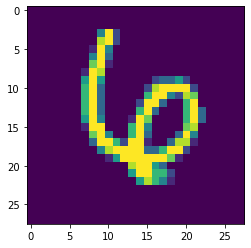

In [104]:
Y_test = Y_test.reshape(1,-1)
print(Y_test.shape)
X_test=X_test.reshape(-1,28,28)
import matplotlib.pyplot as plt
print(X_test.shape)
plt.imshow(X_test[22])

In [105]:
X_test = X_test.reshape(-1, 28*28).T
X_test = X_test/255
print(X_test.shape)
Y_test = np.eye(10)[Y_test.reshape(-1)].T
print(Y_test.shape)

(784, 10000)
(10, 10000)


In [106]:
test_A = forward_propagation(X_test, W, b)
test_cost = compute_cost(Y_test, test_A)
print(test_cost)

0.35729395866780894


In [107]:
print(test_A[:, 22])
print(Y_test[:, 22])

[5.37323109e-09 2.44929424e-07 8.53464258e-04 8.97817312e-07
 2.97617506e-03 1.67227994e-08 9.96145696e-01 8.35574220e-12
 2.34993513e-05 3.76398375e-10]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [108]:
test_A1 = np.zeros((Y_test.shape[0],Y_test.shape[1]))
print(test_A1)
print(np.argmax(test_A[:, 1], axis = 0))
for i in range(Y_test.shape[1]):
    test_A1[np.argmax(test_A[:, i], axis = 0), i] = 1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2


In [109]:
print(test_A1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [110]:
test_A1 = test_A1 - Y_test
print(test_A1.shape)
print(test_A1[:, 0])
test_A1 = np.square(test_A1)
print(test_A1[:, 0])

(10, 10000)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [111]:
error = np.sum(test_A1)*100/(2*Y_test.shape[1])
print(error)

8.33
